In [1]:
import pandas as pd
import seaborn as sns

# configure seaborn's style
sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
# load the california tracts census data
df = pd.read_csv('../data/census_tracts_data_ca.csv', dtype={'GEOID10':str}).set_index('GEOID10')
df.shape

(8057, 27)

In [3]:
# create a new column of income in units of 1000s of USD
df['med_household_income_1000s'] = df['med_household_income'] / 1000

In [4]:
# let's look only at counties in southern california
socal_counties = ['Imperial', 'Kern', 'Los Angeles', 'Orange', 'Riverside', 'San Bernardino',
                  'San Diego', 'San Luis Obispo', 'Santa Barbara', 'Ventura']
mask = df['county_name'].isin(socal_counties)
df_sc = df[mask]
df_sc.shape

(4879, 28)

# Option 1

Use column of income in units of 1000s of USD (see above) for nicer x-tick labels.

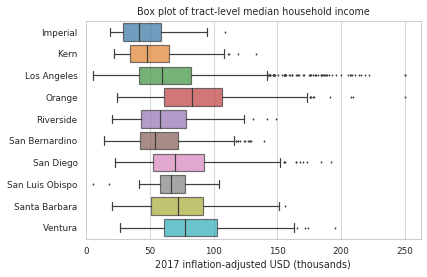

In [5]:
ax = sns.boxplot(x=df_sc['med_household_income_1000s'], y=df_sc['county_name'], fliersize=1, boxprops={'alpha':0.7})

ax.set_xlim(left=0)
ax.set_title('Box plot of tract-level median household income')
ax.set_xlabel('2017 inflation-adjusted USD (thousands)')
ax.set_ylabel('')
pass #just show the figure

# Option 2

Use string formatting to change x-tick labels.

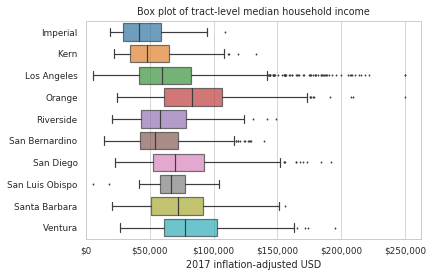

In [6]:
ax = sns.boxplot(x=df_sc['med_household_income'], y=df_sc['county_name'], fliersize=1, boxprops={'alpha':0.7})

ax.set_xlim(left=0)
ax.set_title('Box plot of tract-level median household income')
ax.set_xlabel('2017 inflation-adjusted USD')
ax.set_ylabel('')

# format the x tick labels like $150,000 instead of 150000
new_labels = ['${:,.0f}'.format(x) for x in ax.get_xticks()]
ax.set_xticklabels(new_labels)
pass #just show the figure

The string-formatting code is kinda tricky (and why I skipped it in class): `['${:,.0f}'.format(x) for x in ax.get_xticks()]`

Here's what it does. This is a list comprehension, like we saw a couple of weeks ago. It loops through x.get_ticks(), a collection of the tick positions in the figure:

In [7]:
ax.get_xticks()

array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.])

For each item in the collection, it "formats" a string template with its value. Here's the string template:

In [8]:
'${:,.0f}'

'${:,.0f}'

The curly braces are a placeholder denoting where to insert values of x. The colon tells it where to begin. The comma means group every three zeroes with a comma. The .0 means to round to zero decimal places. The f means that the values will be of type float. So, for example, in the third pass through the loop (0, 1, 2) you get the following string output:

In [9]:
x = ax.get_xticks()[2]
'${:,.0f}'.format(x)

'$100,000'

Or you can round it to two decimal places instead:

In [10]:
'${:,.2f}'.format(x)

'$100,000.00'